# Модель для предсказывания качества ***ВИНИШКА*** 

<img src="http://abblz.ru/wp-content/uploads/2017/11/23164157_131417044288159_7709939172219289600_n.jpg" height="400" width="400">


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('C:/Users/HP/Desktop/data2/Tkachuk_Ekaterina_winemag-data-130k-v2.csv', index_col = 0)
print('Размер выборки:', data.shape) 
data = data.drop(['description'], axis=1)
data = data.drop(['taster_twitter_handle'], axis=1) #дропну и эту категорию, так как считаю, что имени человека хватит для модели
data = data.drop(['taster_name'], axis=1)
data = data.drop(['title'], axis=1)
data.head() 

Размер выборки: (129971, 13)


,country,designation,points,price,province,region_1,region_2,variety,winery
0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,NaN,NaN,Portuguese Red,Quinta dos Avidagos
2,US,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks


## 1. Предобработка данных


<img src="http://images.vfl.ru/ii/1462193478/8dba6865/12518601.jpg">

In [4]:
target_var = ['points']  # целевая переменнаяб далее буду иследовать как непрерывную

categor_var = ['country','variety', 'designation', 'province','region_1', 'region_2', 'winery']     # категориальные
contin_var = ['price'] # непрерывные 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 9 columns):
country        129908 non-null object
designation    92506 non-null object
points         129971 non-null int64
price          120975 non-null float64
province       129908 non-null object
region_1       108724 non-null object
region_2       50511 non-null object
variety        129970 non-null object
winery         129971 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 9.9+ MB


In [6]:
data.isnull().sum()

country           63
designation    37465
points             0
price           8996
province          63
region_1       21247
region_2       79460
variety            1
winery             0
dtype: int64

In [7]:
data.isnull().sum()/len(data)

country        0.000485
designation    0.288257
points         0.000000
price          0.069215
province       0.000485
region_1       0.163475
region_2       0.611367
variety        0.000008
winery         0.000000
dtype: float64

## Категориальные переменные

In [8]:
data[categor_var].head()

,country,variety,designation,province,region_1,region_2,winery
0,Italy,White Blend,Vulkà Bianco,Sicily & Sardinia,Etna,NaN,Nicosia
1,Portugal,Portuguese Red,Avidagos,Douro,NaN,NaN,Quinta dos Avidagos
2,US,Pinot Gris,NaN,Oregon,Willamette Valley,Willamette Valley,Rainstorm
3,US,Riesling,Reserve Late Harvest,Michigan,Lake Michigan Shore,NaN,St. Julian
4,US,Pinot Noir,Vintner's Reserve Wild Child Block,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks


In [9]:
len(data['country'].unique())

44

In [10]:
len(data['variety'].unique())

708

In [11]:
len(data['designation'].unique())

37980

Так как уникальных значений больше 20, то буду делать дальше по гайду :D

### считаем частоты для каждого возможного значения переменной

In [12]:
# country
frequency_encoding = dict(data['country'].value_counts()/len(data))
data['country'] = data['country'].map(frequency_encoding)

In [13]:
#variety
frequency_encoding = dict(data['variety'].value_counts()/len(data))
data['variety'] = data['variety'].map(frequency_encoding)

In [14]:
#designation
frequency_encoding = dict(data['designation'].value_counts()/len(data))
data['designation'] = data['designation'].map(frequency_encoding)

In [15]:
#province
frequency_encoding = dict(data['province'].value_counts()/len(data))
data['province'] = data['province'].map(frequency_encoding)

In [16]:
#region_1
frequency_encoding = dict(data['region_1'].value_counts()/len(data))
data['region_1'] = data['region_1'].map(frequency_encoding)

In [17]:
#region_2
frequency_encoding = dict(data['region_2'].value_counts()/len(data))
data['region_2'] = data['region_2'].map(frequency_encoding)

In [18]:
#winery
frequency_encoding = dict(data['winery'].value_counts()/len(data))
data['winery'] = data['winery'].map(frequency_encoding)

In [19]:
data_categor = data[categor_var]
data[categor_var].head()

,country,variety,designation,province,region_1,region_2,winery
0,0.150341,0.018158,0.000008,0.013826,0.002062,NaN,0.000085
1,0.043787,0.018973,0.000015,0.009856,NaN,NaN,0.000062
2,0.419355,0.011195,NaN,0.041340,0.017704,0.026337,0.000108
3,0.419355,0.039924,0.000062,0.000877,0.000208,NaN,0.000077
4,0.419355,0.102115,0.000008,0.041340,0.017704,0.026337,0.000138


In [20]:
data_categor.isnull().sum()

country           63
variety            1
designation    37465
province          63
region_1       21247
region_2       79460
winery             0
dtype: int64

In [21]:
data_categor = data_categor.fillna(0)
data_categor.head()

,country,variety,designation,province,region_1,region_2,winery
0,0.150341,0.018158,0.000008,0.013826,0.002062,0.000000,0.000085
1,0.043787,0.018973,0.000015,0.009856,0.000000,0.000000,0.000062
2,0.419355,0.011195,0.000000,0.041340,0.017704,0.026337,0.000108
3,0.419355,0.039924,0.000062,0.000877,0.000208,0.000000,0.000077
4,0.419355,0.102115,0.000008,0.041340,0.017704,0.026337,0.000138


In [22]:
data_categor.isnull().sum()


country        0
variety        0
designation    0
province       0
region_1       0
region_2       0
winery         0
dtype: int64

## Непрерывные переменные

Предобработаем целевую, так как она тоже является непрерывной


In [23]:
data_target = data[target_var]
data_target.head()

,points
0,87
1,87
2,87
3,87
4,87


In [24]:
data_target.isnull().sum() #пропусков нет и это хорошо

points    0
dtype: int64

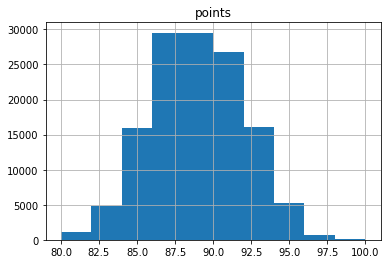

In [25]:
data_target.hist(); #даже не пришлось логарифмировать :)))

In [26]:
data_contin = data[contin_var]
data_contin.head()

,price
0,NaN
1,15.0
2,14.0
3,13.0
4,65.0


In [27]:
data_contin.isnull().sum()

price    8996
dtype: int64

In [28]:
data_contin['price'] = data_contin['price'].fillna(data['price'].mean())
data_contin.head()

,price
0,35.363389
1,15.000000
2,14.000000
3,13.000000
4,65.000000


Посмотрим на распределение всех признаков. На их графики.

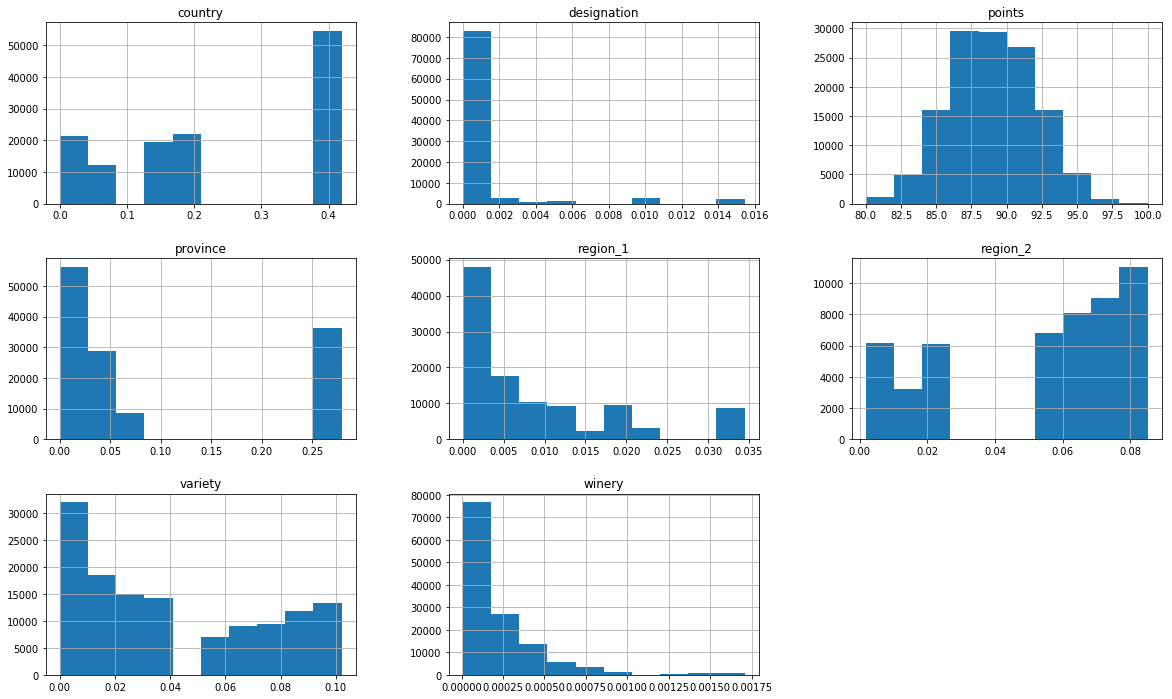

In [29]:
data.drop('price',axis=1).hist(figsize=(20, 12));

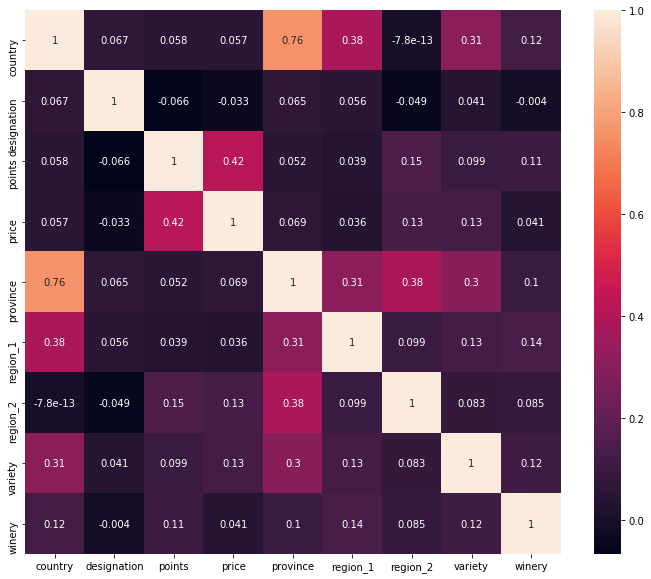

In [30]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True);

Матрица корреляций получилась не такая большая, так как признаков не так много. 

Соберем все данные в одну таблицу

In [31]:
data = pd.concat([data_target, data_contin, data_categor], axis=1)
data.head()

,points,price,country,variety,designation,province,region_1,region_2,winery
0,87,35.363389,0.150341,0.018158,0.000008,0.013826,0.002062,0.000000,0.000085
1,87,15.000000,0.043787,0.018973,0.000015,0.009856,0.000000,0.000000,0.000062
2,87,14.000000,0.419355,0.011195,0.000000,0.041340,0.017704,0.026337,0.000108
3,87,13.000000,0.419355,0.039924,0.000062,0.000877,0.000208,0.000000,0.000077
4,87,65.000000,0.419355,0.102115,0.000008,0.041340,0.017704,0.026337,0.000138


In [32]:
data.isnull().sum()

points         0
price          0
country        0
variety        0
designation    0
province       0
region_1       0
region_2       0
winery         0
dtype: int64

Теперь пропусков нет и это шикарно)

In [33]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.3)

y_train = data_train['points']
y_test = data_test['points']

X_train = data_train.drop(['points'], axis=1)
X_test = data_test.drop(['points'], axis=1)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(data_train[['price', 'country', 'variety', 'designation', 'province', 'region_1', 'region_2', 'winery']]) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
data_train_scale = scaler.transform(data_train[['price', 'country', 'variety', 'designation', 'province', 'region_1', 'region_2', 'winery']])
 
data_test_scale = scaler.transform(data_test[['price', 'country', 'variety', 'designation', 'province', 'region_1', 'region_2', 'winery']])

In [36]:
data_train[['price', 'country', 'variety', 'designation', 'province', 'region_1', 'region_2', 'winery']] = data_train_scale
data_test[['price', 'country', 'variety', 'designation', 'province', 'region_1', 'region_2', 'winery']] = data_test_scale

In [37]:
data_train.head()

,points,price,country,variety,designation,province,region_1,region_2,winery
23127,89,-0.157633,-0.401570,0.339690,-0.244596,-0.427597,-0.475040,-0.664301,-0.636154
91129,91,-0.436176,-1.335728,-0.039830,-0.234989,-0.803830,-0.757267,-0.664301,-0.329492
98254,88,-0.461498,-1.170441,-0.925966,-0.251001,-0.810410,-0.757267,-0.664301,-0.513489
32943,87,-0.512142,-1.371542,-0.996988,-0.254203,-0.816659,-0.757267,-0.664301,-0.666820
126655,85,0.171554,1.117749,-1.037667,6.179412,1.586910,1.187699,2.088542,-0.390824


In [38]:
print(data_train.shape) 
print(data_test.shape)

(90979, 9)
(38992, 9)


## 2. Константный прогноз

Теперь построим константный прогноз. Предположим, что качество любого вина равно среднему значению. Далее мы будм сравнивать с этимм прогнозом прогнозы более сложных моделей.

In [39]:
y_mean = np.mean(y_train)                      
y_pred_naive = np.ones(len(y_test)) * y_mean  
y_pred_naive[:5]

array([88.43480364, 88.43480364, 88.43480364, 88.43480364, 88.43480364])

## 3. Метрики качества для регрессии 

Посмотрим на качество наешго первого прогноза (это тот который выше хахах). Будем использовать метрики качества. Пока глянем на несколько из них. 

In [40]:
from sklearn import metrics  

Первой метрикой будет MAE, средняя абсолютная ошибка. Она вычисляется следующим образом: 

$$ MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|. $$
 

In [41]:
metrics.mean_absolute_error(y_test, y_pred_naive)

2.4922524696737587

In [42]:
metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_naive))

2.1462352172458998e+40

Что-то слишком большое число для ошибки получается, но в среднем это 2 тыс долларов)

Второй метрикой будет MSE , средняя квадратичная ошибка. Она вычисляется как 

$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2.$$


In [43]:
metrics.mean_squared_error(y_test, y_pred_naive)

9.31625203357464

Найдем ошибку в долларах.

In [44]:
metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive)) 

1.7722848910488932e+83

In [45]:
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive)))

4.20985141192524e+41

Теперь посчитаем MAPE, средняя абсолютная процентная ошибка. 

$$
MAPE = \frac{1}{n} \sum_{i=1}^n \frac{|y_i - \hat{y}_i|}{y_i}
$$



In [46]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred_naive)

2.8199679727488616

Средняя ошибка примерно на $2.8\%$ от цены. 

Последняя метрика это коэффициент детерминации, $R^2$. Он отражает то, какую долю дисперсии объясняемой переменной мы объяснили с помощью нашей модели:

$$ R^2 =1- \frac{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \bar{y}_i)^2} $$


In [47]:
metrics.r2_score(y_test, y_pred_naive)

-0.00018147952243752208

Закинем все метрики в одну общую функцию.

In [48]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [49]:
print_metrics(y_test, y_pred_naive)

MAE: 2.1462352172458998e+40
RMSE: 4.20985141192524e+41
R2: -0.00018147952243752208
MAPE: 2.8199679727488616


## 3. Строим первую регрессию

Эта модель показывает, что качество вина основывается на результате суммирования тех характеристик, которыми она обладает с какими-то весами

$$\hat{y} = \beta_0 + \beta_1 x_1 + ... \beta_n x_n.$$


In [50]:
from sklearn.linear_model import LinearRegression

model_regression = LinearRegression()
 
model_regression.fit(X_train, y_train)

y_pred_regr = model_regression.predict(X_test)

In [51]:
print_metrics(y_test,y_pred_regr)

MAE: 6.092474189771658e+65
RMSE: 1.2030438216103726e+68
R2: 0.1843088924940648
MAPE: 2.4902093094996025


Посмотрим на то, какие признаки вносят в качество вина наибольший вклад. 

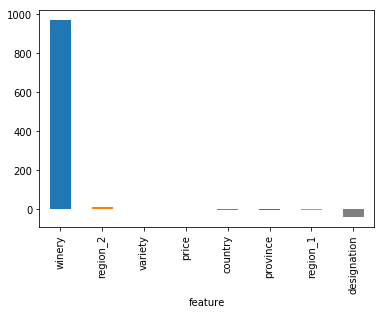

In [52]:
featureImportance = pd.DataFrame({"feature": data.drop('points',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

Наибольший вклад вносит winery

## 4. Строим Lasso-регрессию 


In [53]:
from sklearn.linear_model import Lasso

model_simplelasso = Lasso()

model_simplelasso.fit(X_train, y_train)

y_pred_lasso = model_simplelasso.predict(X_test)

Посмотрим на важность факторов для качества вина. 

<img src="https://blabber.freelance.ru/uploads/images/00/00/31/2016/05/18/fd9513.jpg">

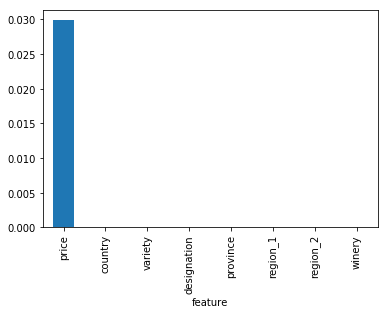

In [54]:
featureImportance = pd.DataFrame({"feature": data.drop('points',axis=1).columns, 
                                  "importance": model_simplelasso.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

График показывает, что наиболее важный фактор и единственный это цена. 

In [55]:
print_metrics(y_test,y_pred_lasso)

MAE: 6.805457782709881e+65
RMSE: 1.3438323547088963e+68
R2: 0.16954799859422054
MAPE: 2.5120360608972385


## 5. Подбор гиперпараметра для Lasso-регрессии

In [59]:
from sklearn.grid_search import GridSearchCV
 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10]}

model_lasso = Lasso() 

grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

y_pred_lasso = grid_cv_lasso.predict(X_test)

Лучшее значение параметра: {'alpha': 0.001}


При параметре 0.001 качество у прогнозов получилось самым хорошим. Посмотрим на важность переменных

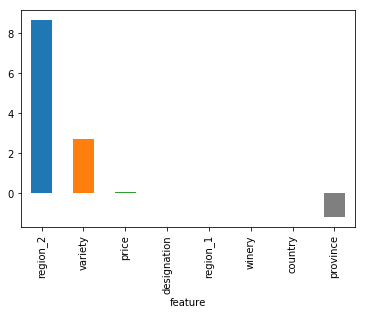

In [60]:
featureImportance = pd.DataFrame({"feature": data.drop('points',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

In [61]:
print_metrics(y_test,y_pred_lasso)

MAE: 1.1868610110322994e+66
RMSE: 2.343622257512478e+68
R2: 0.1779319601561683
MAPE: 2.4998108748179817


## 6. Случайный лес

In [62]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_train, y_train)

y_pred_forest = rf.predict(X_test)

Посмотрим на важность факторов. 

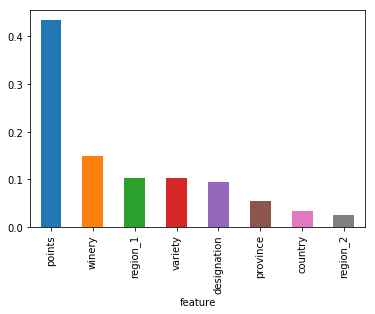

In [63]:
featureImportance = pd.DataFrame({"feature": data.drop('price',axis=1).columns, 
                                  "importance": rf.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

## 7. Сравниваем модели между собой 

In [64]:
print_metrics(y_test,y_pred_naive)

MAE: 2.1462352172458998e+40
RMSE: 4.20985141192524e+41
R2: -0.00018147952243752208
MAPE: 2.8199679727488616


In [65]:
print_metrics(y_test,y_pred_regr)

MAE: 6.092474189771658e+65
RMSE: 1.2030438216103726e+68
R2: 0.1843088924940648
MAPE: 2.4902093094996025


In [66]:
print_metrics(y_test,y_pred_lasso)

MAE: 1.1868610110322994e+66
RMSE: 2.343622257512478e+68
R2: 0.1779319601561683
MAPE: 2.4998108748179817


In [67]:
print_metrics(y_test,y_pred_forest)

MAE: 2.0328006545832474e+40
RMSE: 4.118269638921821e+41
R2: 0.47764628377033747
MAPE: 1.9046526322276869


Самое хорошее качество дал случайный лес. Недалеко от него ушла обычная линейная регрессия. 
(Почему-то совпадают выводы с результатами из семинара)

<img src="http://telegram.org.ru/uploads/posts/2017-09/1506802266_file_154324.jpg" height="400" width="400">